# Modellaufbau und Training

---

Autor: mn086

---

## Setup

In [1]:
import os
from typing import List, Dict, Tuple
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import altair as alt
import joblib

## Daten-Import

**Pfade:**

In [2]:
root_processed = os.path.join('..', 'data', 'processed')
root_models = os.path.join('..', 'models')

**Import in Dataframes**

In [3]:
# Datensatz mit Ausreißer
df_regr = pd.read_csv(os.path.join(root_processed, 'regression_data.csv'))
# Datensatz ohne Ausreißer
df_regr_filtered = pd.read_csv(os.path.join(root_processed, 'regression_data_filtered.csv'))

## Daten-Struktur

In [ ]:
df_regr.tail(3)

,anzahl_personen_1000,vee,anzahl_kfz_je_person,unfaelle_je_10k_kfz,elektro,pih,euro2,euro3,euro4,euro6,euro6dt
396,NaN,25966.0,NaN,50.5,0.246801,0.123908,5.708917,6.968312,27.723949,23.002234,4.853748
397,NaN,26021.0,NaN,51.7,0.279993,0.168433,6.172961,7.648391,27.577080,22.237534,5.418294
398,NaN,25954.0,NaN,63.3,0.344202,0.192435,4.607541,6.389057,24.128833,26.149405,6.292839


In [5]:
df_regr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anzahl_personen_1000  216 non-null    float64
 1   vee                   399 non-null    float64
 2   anzahl_kfz_je_person  216 non-null    float64
 3   unfaelle_je_10k_kfz   399 non-null    float64
 4   elektro               399 non-null    float64
 5   pih                   399 non-null    float64
 6   euro2                 399 non-null    float64
 7   euro3                 399 non-null    float64
 8   euro4                 399 non-null    float64
 9   euro6                 399 non-null    float64
 10  euro6dt               399 non-null    float64
dtypes: float64(11)
memory usage: 34.4 KB


In [6]:
df_regr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anzahl_personen_1000  215 non-null    float64
 1   vee                   398 non-null    float64
 2   anzahl_kfz_je_person  215 non-null    float64
 3   unfaelle_je_10k_kfz   398 non-null    float64
 4   elektro               398 non-null    float64
 5   pih                   398 non-null    float64
 6   euro2                 398 non-null    float64
 7   euro3                 398 non-null    float64
 8   euro4                 398 non-null    float64
 9   euro6                 398 non-null    float64
 10  euro6dt               398 non-null    float64
dtypes: float64(11)
memory usage: 34.3 KB


## Variablen Listen

In [7]:
y_label = "euro4"
features = ["vee", "unfaelle_je_10k_kfz", "elektro", "pih", "euro2", "euro3", "euro6dt"]

# Daten mit Ausreißer
X = df_regr[features]
y = df_regr[y_label]
# Datensatz ohne Ausreißer
X_filtered = df_regr_filtered[features]
y_filtered = df_regr_filtered[y_label]

y_label = "euro6dt"
features = ["vee", "unfaelle_je_10k_kfz", "elektro", "pih", "euro2", "euro3", "euro4"]

X = df_regr[features]
y = df_regr[y_label]

## Daten aufteilen, Train-Test-Split

In [8]:
# Daten mit Ausreißer
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% Testdaten
    random_state=42    # Für Reproduzierbarkeit
)
# Daten ohne Ausreißer
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, 
    test_size=0.2,     # 20% Testdaten
    random_state=42    # Für Reproduzierbarkeit
)

## Modell

### Auswahl des Modells

In [9]:
regr = LinearRegression()

### Modell mit Ausreißer trainieren

In [10]:
regr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Modell speichern
joblib.dump(regr, os.path.join(root_models, "lineare_regression_mit_ausreisser.joblib"))

['..\\models\\lineare_regression_mit_ausreisser.joblib']

Im Rahmen der Analyse wird das Bestimmtheitsmaß R² für das multiple lineare Regressionsmodell sowohl für die Trainings- als auch für die Testdaten berechnet. Dabei werden die Daten inklusive eines identifizierten Ausreißers verwendet.

In [12]:
# Bestimmtheitsmaß R² für Trainings- und Test Daten mit Ausreißer berechnen
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)

print(f'R² Training: {r2_train:.4f}')
print(f'R² Test: {r2_test:.4f}')

R² Training: 0.8823
R² Test: 0.8002


Diese Ergebnisse zeigen, dass das Modell eine hohe Erklärungskraft für die Trainingsdaten aufweist und auch auf den Testdaten eine gute Generalisierbarkeit besitzt. Das Modell kann somit als robust und zuverlässig angesehen werden, obwohl ein Ausreißer in den Daten vorhanden ist.

Die Leistung auf den Testdaten ist etwas schlechter und beträgt etwa 0.082, was einem Leistungsabfall von ca. 8.2 Prozentpunkten entspricht. Eine etwas schlechtere Performance auf den Testdaten ist ein typisches Phänomen. Die Differenz liegt im üblichen Rahmen und ist nicht so groß, dass von Overfitting gesprochen werden müsste.

In [13]:
# Bestimmtheitsmaß R² für Trainings- und Test Daten ohne Ausreißer berechnen
r2_train_filterd = regr.score(X_train_filtered, y_train_filtered)
r2_test_filterd = regr.score(X_test_filtered, y_test_filtered)

print(f'R² Training: {r2_train_filterd:.4f}')
print(f'R² Test: {r2_test_filterd:.4f}')

R² Training: 0.8793
R² Test: 0.8313


Die Leistung auf den Testdaten verbessert sich, wenn der Ausreißer entfernt wird, was darauf hindeutet, dass der Ausreißer die Modellleistung negativ beeinflusst.

### Modell ohne Ausreißer trainieren

In [14]:
regr.fit(X_train_filtered, y_train_filtered)

LinearRegression()

In [15]:
# Modell speichern
joblib.dump(regr, os.path.join(root_models, "lineare_regression_ohne_ausreisser.joblib"))

['..\\models\\lineare_regression_ohne_ausreisser.joblib']

In [16]:
# Bestimmtheitsmaß R² für Trainings- und Test Daten ohne Ausreißer berechnen
r2_train_filterd = regr.score(X_train_filtered, y_train_filtered)
r2_test_filterd = regr.score(X_test_filtered, y_test_filtered)

print(f'R² Training: {r2_train_filterd:.4f}')
print(f'R² Test: {r2_test_filterd:.4f}')

R² Training: 0.8806
R² Test: 0.8244


Das Modell ohne Ausreißer zeigt eine konsistente Leistung auf Trainings- und Testdaten, was auf eine bessere Generalisierbarkeit hinweist. Daher sollte dieses Modell bevorzugt werden.

**R² = 0.88 auf Testdaten bedeutet:**

1. **Interpretation des R²-Werts**:
   - 88% der Varianz in den Testdaten wird durch das Modell erklärt
   - Ein Wert von 1.0 wäre perfekte Vorhersage
   - Ein Wert von 0.0 bedeutet keine Vorhersagekraft

2. **Bewertung**:
   - Guter Wert für reale Daten
   - Zeigt starken Zusammenhang zwischen Features und Zielvariable
   - Modell hat gute Generalisierungsfähigkeit, da auf Testdaten gemessen

3. **Einschränkungen**:
   - Etwa 12% der Varianz bleiben unerklärt
   - Weitere Faktoren könnten Einfluss haben
   - Mögliche nicht-lineare Zusammenhänge werden nicht erfasst

**Vergleichende Analyse der Modelle**

| Metrik | Mit Ausreißer | Ohne Ausreißer | Differenz |
|--------|---------------|----------------|-----------|
| R² Training | 0.8823 | 0.8806 | -0.0017 |
| R² Test | 0.8002 | 0.8244 | +0.0242 |

Die Entfernung des Ausreißers führt zu folgenden Verbesserungen:
- Minimaler Rückgang der Trainingsperformance (-0.17 Prozentpunkte)
- Deutliche Verbesserung der Testperformance (+2.42 Prozentpunkte)
- Geringere Differenz zwischen Training und Test (von 8.21 auf 5.62 Prozentpunkte)

Das Modell ohne Ausreißer zeigt eine bessere Generalisierungsfähigkeit und stabilere Performance, was für dessen Verwendung in der weiteren Analyse spricht.

### Rückwärtseliminierung mit adjustiertes R²

#### Vergleich R² vs. adjustiertes R²

- Reguläres R² ist typischerweise höher als adjustiertes R²
- **Aber**: R² steigt automatisch mit der Anzahl der Features und bedeutet nicht unbedingt ein besseres Modell, da es durch zusätzliche Features künstlich aufgebläht sein könnte.
- Adjustiertes R² berücksichtigt die Anzahl der Features und bestraft Overfitting. Daher ist adjustiertes R² aussagekräftiger für die Modellbewertung

In [17]:
def calculate_adjusted_r2(X: pd.DataFrame, 
                        y: pd.Series, 
                        model: LinearRegression = None) -> float:
    """
    Berechnet das angepasste R² für ein lineares Regressionsmodell.
    
    Args:
        X (pd.DataFrame): Features/Prädiktoren Matrix
        y (pd.Series): Zielvariable
        model (LinearRegression, optional): Vortrainiertes lineares Regressionsmodell.
            Falls None, wird ein neues Modell erstellt und trainiert.
    
    Returns:
        float: Angepasstes Bestimmtheitsmaß (R²)
            - Wertebereich: (-∞, 1]
            - 1: perfekte Vorhersage
            - 0: Modell ist nicht besser als der Mittelwert
            - < 0: Modell ist schlechter als der Mittelwert
            - Berücksichtigt die Anzahl der Features (p) und Beobachtungen (n)
            - Formel: 1 - (1 - R²) * (n-1)/(n-p-1)
    """
    if model is None:
        model = LinearRegression()
        model.fit(X, y)
    n, p = X.shape  # n: Anzahl der Beobachtungen, p: Anzahl der Features
    r2 = model.score(X, y)  # Bestimmtheitsmaß R²
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
print(f'Angepasstes R² Training: {calculate_adjusted_r2(X_train_filtered, y_train_filtered, model=regr):.4f}')
print(f'Angepasstes R² Test: {calculate_adjusted_r2(X_test_filtered, y_test_filtered, model=regr):.4f}')

Angepasstes R² Training: 0.8779
Angepasstes R² Test: 0.8073


Mit Hilfe der Funktion `backward_elimination()` soll eine Rückwärtselimination durchgeführt werden: Es wird geprüft, ob das Entfernen eines Prädiktors das adjustierte 𝑅² verbessern würde. Dazu wird jeweils ein anderer Prädiktor ausgeschlossen und das adjustierte 𝑅² notiert. Das höchste adjustierte 𝑅², welches höher als das adjustierte 𝑅² des vollständigen Modells sein muss, beschreibt das neue Basismodell. Diese Schritte werden durchlaufen und erneut überprüft, bis das höchste adjustierte 𝑅² kleiner oder gleich dem adjustierten 𝑅² des Basismodells ist (ein weiterer Ausschluss eines der verbleibenden Prädiktoren würde zur Verschlechterung des Modells führen).

In [19]:
def backward_elimination(X: pd.DataFrame, 
                       y: pd.Series, 
                       verbose: bool = True) -> Tuple[List[str], float, List[Dict]]:
    """
    Führt eine Rückwärtselimination basierend auf dem adjustierten R² durch.
    
    Args:
        X (pd.DataFrame): Feature-Matrix
        y (pd.Series): Zielvariable
        verbose (bool): Wenn True, werden Zwischenergebnisse ausgegeben
    
    Returns:
        Tuple[List[str], float, List[Dict]]: 
            - Liste der besten Features
            - Finales adjustiertes R²
            - Historie der Elimination
    """
    features = list(X.columns)
    elimination_history = []
    
    # Initiales Modell
    best_adj_r2 = calculate_adjusted_r2(X, y)
    best_features = features.copy()
    
    if verbose:
        print(f"Start mit {len(features)} Features, Adj. R² = {best_adj_r2:.4f}")
    
    while len(features) > 1:
        results = {}
        # Evaluiere alle möglichen Feature-Kombinationen parallel
        for feature in features:
            remaining_features = [f for f in features if f != feature]
            X_subset = X[remaining_features]
            results[feature] = calculate_adjusted_r2(X_subset, y)
        
        # Finde bestes Ergebnis
        best_feature = max(results.items(), key=lambda x: x[1])
        
        # Prüfe ob Verbesserung
        if best_feature[1] > best_adj_r2:
            removed_feature = best_feature[0]
            best_adj_r2 = best_feature[1]
            features.remove(removed_feature)
            best_features = features.copy()
            
            elimination_history.append({
                'step': len(elimination_history) + 1,
                'removed_feature': removed_feature,
                'adj_r2': best_adj_r2,
                'n_features': len(features)
            })
            
            if verbose:
                print(f"Feature '{removed_feature}' entfernt: Adj. R² = {best_adj_r2:.4f}")
        else:
            break
            
    return best_features, best_adj_r2, elimination_history

In [20]:
# Rückwärtselimination mit Ausreißer durchführen
best_features, final_adj_r2, history = backward_elimination(X_train, y_train)

Start mit 7 Features, Adj. R² = 0.8797


In [21]:
# Ergebnisse ausgeben
print(f"Bestes adjustiertes R²: {final_adj_r2:.4f}")
print("\nSelektierte Features:")
for feature in best_features:
    print(f"- {feature}")

print("\nEliminations-Historie:")
if not history:
    print("\nEs wurden keine Features entfernt.")
else:
    for step in history:
        print(f"\nEntferntes Feature: {step['removed_feature']}")
        print(f"Adjustiertes R²: {step['adj_r2']:.4f}")

Bestes adjustiertes R²: 0.8797

Selektierte Features:
- vee
- unfaelle_je_10k_kfz
- elektro
- pih
- euro2
- euro3
- euro6dt

Eliminations-Historie:

Es wurden keine Features entfernt.


In [22]:
# Rückwärtselimination ohne Ausreißer durchführen
best_features, final_adj_r2, history = backward_elimination(X_train_filtered, y_train_filtered)

Start mit 7 Features, Adj. R² = 0.8779
Feature 'elektro' entfernt: Adj. R² = 0.8779


In [23]:
# Ergebnisse ausgeben
print(f"Bestes adjustiertes R²: {final_adj_r2:.4f}")
print("\nSelektierte Features:")
for feature in best_features:
    print(f"- {feature}")

print("\nEliminations-Historie:")
if not history:
    print("\nEs wurden keine Features entfernt.")
else:
    for step in history:
        print(f"\nEntferntes Feature: {step['removed_feature']}")
        print(f"Adjustiertes R²: {step['adj_r2']:.4f}")

Bestes adjustiertes R²: 0.8779

Selektierte Features:
- vee
- unfaelle_je_10k_kfz
- pih
- euro2
- euro3
- euro6dt

Eliminations-Historie:

Entferntes Feature: elektro
Adjustiertes R²: 0.8779


Die Rückwärtselimination zeigt interessante Unterschiede zwischen den Modellen:

Modell mit Ausreißer:
- Startwert des adjustierten R² bei 0.8797
- Keine Prädiktoren wurden eliminiert
- Alle sieben Features tragen signifikant zur Modellgüte bei

Modell ohne Ausreißer:
- Startwert des adjustierten R² bei 0.8779
- Feature 'elektro' wurde als einziges eliminiert
- Die Elimination führt zu keiner Verschlechterung des adjustierten R²

Der Ausreißer befindet sich der Variable `elektro`. Nach dessen Entfernung verliert diese Variable ihre Bedeutung für das Modell, während die übrigen Prädiktoren weiterhin relevant bleiben. Die nahezu identischen R²-Werte vor und nach der Elimination zeigen, dass `elektro` keinen substanziellen Beitrag zur Modellgüte leistet.

In [24]:
# Modell trainieren mit den besten Prädiktoren
regr.fit(X_train_filtered[best_features], y_train_filtered)

LinearRegression()

In [25]:
# Modell speichern
joblib.dump(regr, os.path.join(root_models, "lineare_regression_ohne_ausreisser_rweliminiert.joblib"))

['..\\models\\lineare_regression_ohne_ausreisser_rweliminiert.joblib']

In [26]:
# Berechne und zeige die Modellgüte mittels adjustierten R²
print(f'Angepasstes R² Training: {calculate_adjusted_r2(X_train_filtered, y_train_filtered, model=regr):.4f}')
print(f'Angepasstes R² Test: {calculate_adjusted_r2(X_test_filtered, y_test_filtered, model=regr):.4f}')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- elektro


### Kreuzvalidierung

Die Kreuzvalidierung bietet eine umfassendere Bewertung der Modellleistung. Der Mittelwert und die Standardabweichung der Kreuzvalidierungsergebnisse helfen, die Robustheit und Konsistenz des Modells zu beurteilen. Es wird empfohlen, die Kreuzvalidierung als zusätzlichen Validierungsschritt einzuführen, um die Generalisierbarkeit des Modells zu bestätigen.


In [ ]:
# Kreuzvalidierung durchführen (z.B. 5-Fold)
cv_scores = cross_val_score(LinearRegression(), X_train_filtered, y_train_filtered, cv=5, scoring='r2')

# Ergebnisse anzeigen
print(f'Kreuzvalidierungs-R² Scores: {cv_scores}')
print(f'Mittelwert der Scores: {cv_scores.mean():.4f}')
print(f'Standardabweichung der Scores: {cv_scores.std():.4f}')

Kreuzvalidierungs-R² Scores: [0.74759209 0.89525384 0.83436319 0.88378105 0.90148455]
Mittelwert der Scores: 0.8525
Standardabweichung der Scores: 0.0575


**Interpretation der Ergebnisse**:
1. Kreuzvalidierungs-R² Scores:
 - Liste der R² Scores für jeden Fold
 - Zeigt die Leistung des Modells in verschiedenen Datenaufteilungen
2. Mittelwert der Scores:
 - Durchschnittliche Modellleistung
 - Höherer Wert 0.8525 deutet auf gute Generalisierbarkeit hin
3. Standardabweichung der Scores:
 - Variabilität der Modellleistung
 - Niedrigere Werte deuten auf konsistentere Leistung hin

### Residualanalyse

Durch die Residualanalyse wird sichergestellt, dass das Modell korrekt spezifiziert ist und keine systematischen Fehler aufweist. Dies ist ein wichtiger Schritt zur Validierung und Verbesserung des Modells. Die Diagramme sollten folgende Eigenschaften aufweisen:

1. **Zufällige Verteilung:**
    - **Training:** Residuen sollten zufällig um die Linie y=0 verteilt sein.
    - **Test:** Ähnliches Muster wie im Training.

2. **Homoskedastizität:**
    - **Training:** Konstante Streuung der Residuen.
    - **Test:** Keine systematischen Muster.

3. **Normalverteilung:**
    - **Training:** Residuen sollten normalverteilt sein.
    - **Test:** Ähnliches Muster wie im Training.

4. **Ausreißer:**
    - **Training:** Identifikation und Untersuchung von Ausreißern.
    - **Test:** Ähnliches Muster wie im Training.

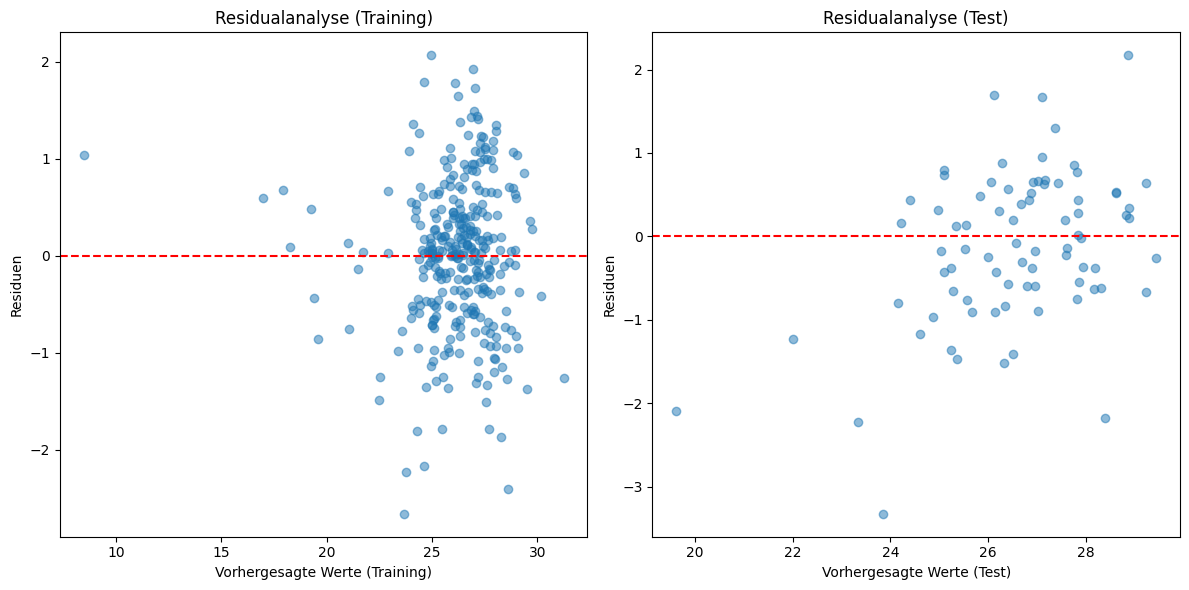

In [ ]:
# Beispiel für Residualanalyse:
import matplotlib.pyplot as plt

# Residuen berechnen
y_train_pred = regr.predict(X_train_filtered)
y_test_pred = regr.predict(X_test_filtered)
residuals_train = y_train_filtered - y_train_pred
residuals_test = y_test_filtered - y_test_pred

# Residuen plotten
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Vorhergesagte Werte (Training)')
plt.ylabel('Residuen')
plt.title('Residualanalyse (Training)')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Vorhergesagte Werte (Test)')
plt.ylabel('Residuen')
plt.title('Residualanalyse (Test)')

plt.tight_layout()
plt.show()

Überprüfung der Normalverteilung mittels:

**Histogramm** (Visuelle Überprüfung der Normalverteilung):
- Sollte eine glockenförmige Kurve zeigen
- Hinweis auf Normalverteilung

**Q-Q-Plot** (Visuelle Überprüfung der Normalverteilung):
- Punkte sollten auf der Diagonalen liegen
- Hinweis auf Normalverteilung

**Shapiro-Wilk-Test** (Statistische Überprüfung der Normalverteilung):
- Nullhypothese: Residuen sind normalverteilt
- p-Wert > 0.05: Keine Ablehnung der Nullhypothese (Normalverteilung)
- p-Wert ≤ 0.05: Ablehnung der Nullhypothese (keine Normalverteilung)

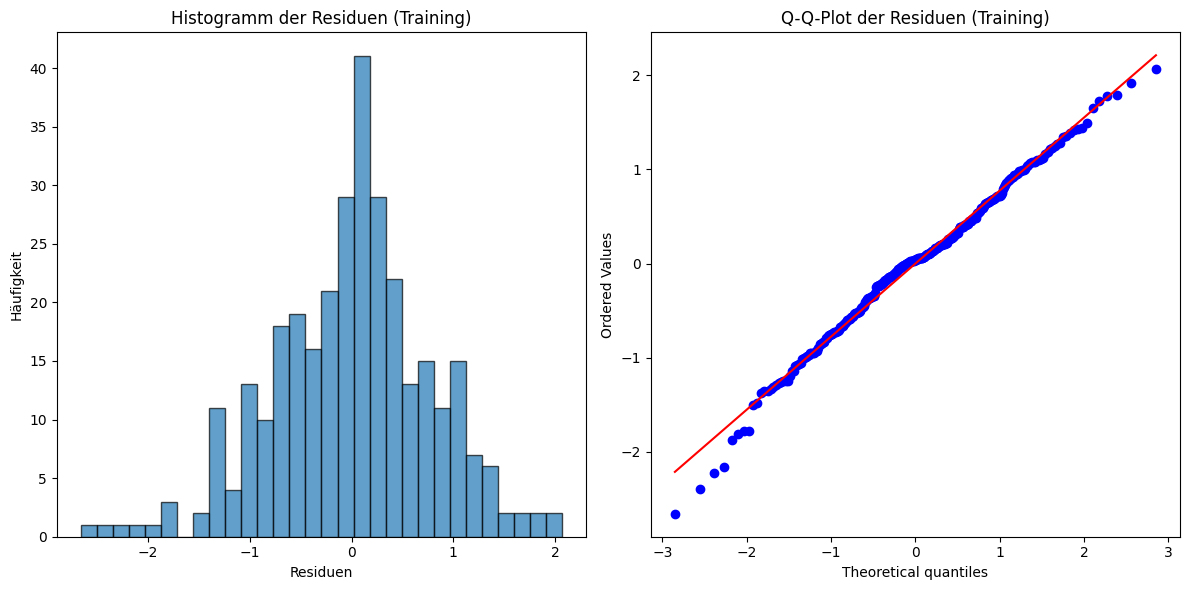

Shapiro-Wilk-Test: W=0.9918, p=0.0759


In [ ]:
# Histogramm der Residuen
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Residuen (Training)')

# Q-Q-Plot der Residuen
plt.subplot(1, 2, 2)
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q-Plot der Residuen (Training)')

plt.tight_layout()
plt.show()

# Shapiro-Wilk-Test für Normalverteilung
shapiro_test = stats.shapiro(residuals_train)
print(f'Shapiro-Wilk-Test: W={shapiro_test.statistic:.4f}, p={shapiro_test.pvalue:.4f}')

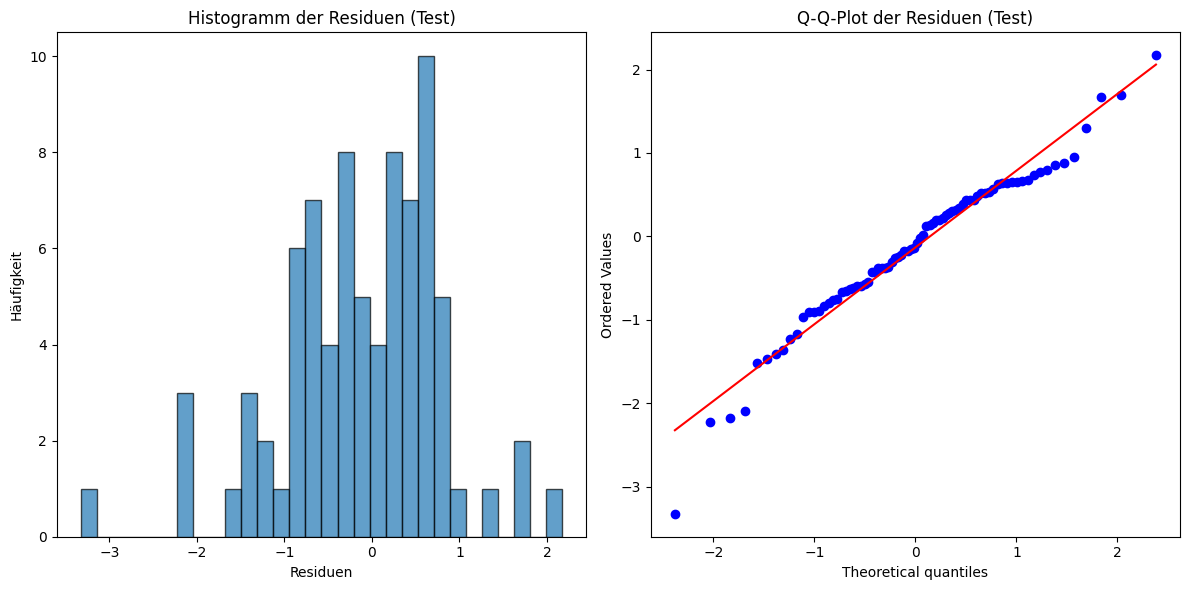

Shapiro-Wilk-Test: W=0.9701, p=0.0574


In [ ]:
# Histogramm der Residuen
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(residuals_test, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Residuen (Test)')

# Q-Q-Plot der Residuen
plt.subplot(1, 2, 2)
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q-Plot der Residuen (Test)')

plt.tight_layout()
plt.show()

# Shapiro-Wilk-Test für Normalverteilung
shapiro_test = stats.shapiro(residuals_test)
print(f'Shapiro-Wilk-Test: W={shapiro_test.statistic:.4f}, p={shapiro_test.pvalue:.4f}')